In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from process_score_calculator import  prepare_calculations as calculate_scores
from performance_analyzer import perform_analysis as analyze_performance
from openai_image_analyzer import analyze_image

import warnings
warnings.filterwarnings("ignore")

In [8]:

scores_data = calculate_scores(MAC=True, DataName="BPIC_2019", layer="General_Process_Standards", index='case_id')
data = scores_data.data
data.head(2)

,eventID,cat_dim_5,cat_dim_4,cat_dim_3,cat_dim_2,case_Purchasing_Document,case_Purch._Doc._Category_name,cat_dim_8,cat_dim_6,cat_dim_7,...,timestamp,case:concept:name,concept:name,time:timestamp,score_found_case_id,score_sequential_case_id,score_equilibrium_case_id,score_singular_case_id,score_exclusion_case_id,mean_score
0,536870912000,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,2017-01-31 23:59:00+00:00,2000000100_00001,Vendor creates invoice,2017-01-31 23:59:00+00:00,0.001112,0.0,0.000548,0.0,0.000894,0.000511
1,536870912001,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,2017-05-25 23:59:00+00:00,2000000100_00001,Vendor creates invoice,2017-05-25 23:59:00+00:00,0.001112,0.0,0.000548,0.0,0.000894,0.000511


## Create Sample Data

In [10]:
#read the data from /Users/urszulajessen/code/gitHub/WISE/data/data_BPIC_2019/BPIC_2019.csv and get 50 random case_id
import pandas as pd
df_sample = pd.read_csv("/Users/urszulajessen/code/gitHub/WISE/data/data_BPIC_2019/BPIC_2019.csv")
random_case_id = df_sample["case_concept_name"].sample(n=50)
df_sample = df_sample[df_sample["case_concept_name"].isin(random_case_id)]
#save it to /Users/urszulajessen/code/gitHub/WISE/data/data_BPIC_2019_Service/BPIC_2019_Service.csv
df_sample.to_csv("/Users/urszulajessen/code/gitHub/WISE/data/data_sample/sample.csv", index=False)
#example to describe the data and Domain Knowledge -' Create Purchase Order Item only 1x but Record Goods Receipt 117 x and Vendor creates invoice 21x and clear invoice 29x
df_sample[df_sample["case_concept_name"] == "2000000100_00001"].head(2)

,eventID,case_Spend_area_text,case_Company,case_Document_Type,case_Sub_spend_area_text,case_Purchasing_Document,case_Purch._Doc._Category_name,case_Vendor,case_Item_Type,case_Item_Category,...,event_User,event_org_resource,event_concept_name,event_Cumulative_net_worth_(EUR),event_time_timestamp,@@index,@@case_index,case:concept:name,concept:name,time:timestamp
0,536870912000,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,NONE,NONE,Vendor creates invoice,7815013.0,2017-01-31 23:59:00+00:00,0,0,2000000100_00001,Vendor creates invoice,2017-01-31 23:59:00+00:00
1,536870912001,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,NONE,NONE,Vendor creates invoice,7815013.0,2017-05-25 23:59:00+00:00,1,0,2000000100_00001,Vendor creates invoice,2017-05-25 23:59:00+00:00


Analyze performance for different categories

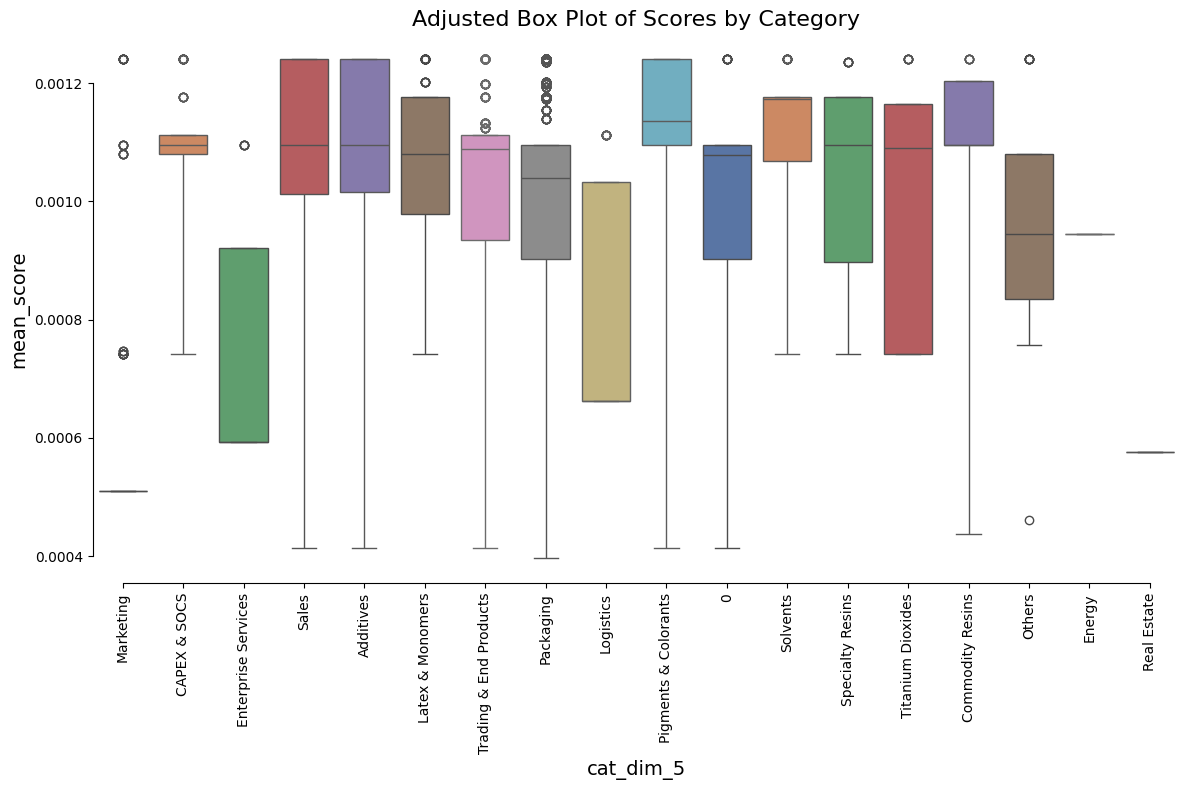

In [11]:
analyze_performance(visualize=True, category='cat_dim_5', score='mean_score')

## OPENAI Analysis

In [6]:
category = 'cat_dim_5'
image_path = f'/Users/urszulajessen/code/gitHub/WISE/data/results/data_BPIC_2019/{category}_adjusted_boxplot.png'
prompt = """
You are experienced data analyst. This data shows the performance of a process scored for different process relevant features.
The data comes from the BPIC 2019 dataset. Analyze the image and provide insights. Create the plan for next steps.
Make it consise and actionable.
"""

response = analyze_image(api_key=None,image_path=image_path,prompt=prompt)
print(response)


The image displays an adjusted box plot of scores by category for various process-relevant features within a process performance analysis. Here are some insights and a plan for the next steps:

**Insights:**

1. **Variability:** Different categories exhibit varying degrees of score spread, as indicated by the size of the boxes. Categories with larger boxes, such as Commodity Resins and Specialty Resins, show greater variability in their scores, suggesting inconsistent performance. This might warrant further investigation to understand the causes of this inconsistency.

2. **Overall Score Range:** The mean scores seem to be in a similar range across most categories, falling mostly between 0.0006 and 0.0012. However, there is a clear outlier with significantly lower scores, which is the Marketing category.

3. **Outliers:** Several categories (CAPEX & SOCs, Enterprise Services, Additives, Logistics, Pigments & Colorants, Solvents, Commodity Resins) show individual outlier scores that are

## Chat GPT Feedback (Chat GPT 4 Turbo called on 12.05.2024)

## Detailed Analysis Recommendations Based on Adjusted Box Plot of Scores by Category

### 1. Categories with High Variability
- **Focus Areas**: "Additives", "Logistics", and "Specialty Resins" show high variability in scores, as indicated by the length of their box plots and the presence of many outliers.
- **Action**: Investigate the factors causing this variability to understand inconsistencies in performance or measurement within these categories.

### 2. Low Score Categories
- **Focus Areas**: "Marketing" and "Enterprise Services" appear to have significantly lower median scores compared to other categories.
- **Action**: Dive deeper into these categories to determine the causes of these lower scores and identify potential areas for improvement.

### 3. Outlier Analysis
- **Focus Areas**: Categories such as "Additives", "Logistics", and "Pigments & Colorants" display a significant number of outliers above the upper whisker.
- **Action**: Analyzing these outliers could provide insights into exceptional cases or errors in data collection or processing.

### 4. Performance Trends and Patterns
- **Action**: Compare these categories against other dimensions (like time, geographical location, or specific business units) to reveal trends or patterns in performance. Analyzing temporal trends could show whether the performance is improving or deteriorating over time.

### 5. Cross-Category Analysis
- **Action**: Examine the relationships between categories to yield insights. Factors leading to high performance in "Commodity Resins" and "Energy" might be leveraged to improve performance in lower-scoring categories.

### 6. Detailed Statistical Analysis
- **Action**: Employ statistical tests to compare the means and variances of these categories or conduct regression analysis to understand the impact of various factors on the scores.

### 7. Qualitative Feedback
- **Action**: Integrate qualitative data, such as feedback from stakeholders in underperforming categories like "Marketing" and "Enterprise Services," to offer context to the numerical data, helping to pinpoint specific issues or opportunities for improvement.

---
By focusing on these areas, we can develop a more nuanced understanding of the factors influencing performance across different segments of the business, thereby informing targeted strategies for enhancement.


## Analyze Marketing data

In [7]:
data_marketing = data[data.cat_dim_5== 'Marketing']
data_marketing.head(2)

,eventID,cat_dim_5,cat_dim_4,cat_dim_3,cat_dim_2,case_Purchasing_Document,case_Purch._Doc._Category_name,cat_dim_8,cat_dim_6,cat_dim_7,...,timestamp,case:concept:name,concept:name,time:timestamp,score_found_case_id,score_sequential_case_id,score_equilibrium_case_id,score_singular_case_id,score_exclusion_case_id,mean_score
0,536870912000,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,2017-01-31 23:59:00+00:00,2000000100_00001,Vendor creates invoice,2017-01-31 23:59:00+00:00,0.001112,0.0,0.000548,0.0,0.000894,0.000511
1,536870912001,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,2017-05-25 23:59:00+00:00,2000000100_00001,Vendor creates invoice,2017-05-25 23:59:00+00:00,0.001112,0.0,0.000548,0.0,0.000894,0.000511


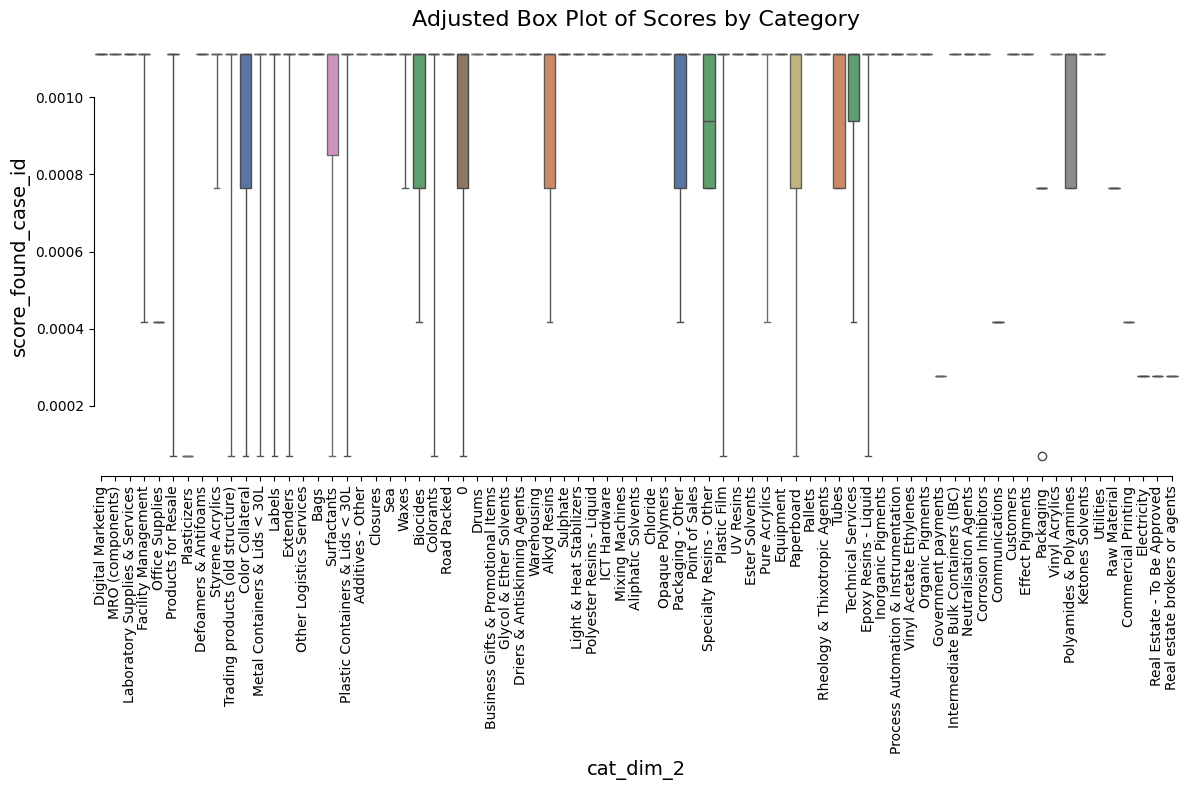

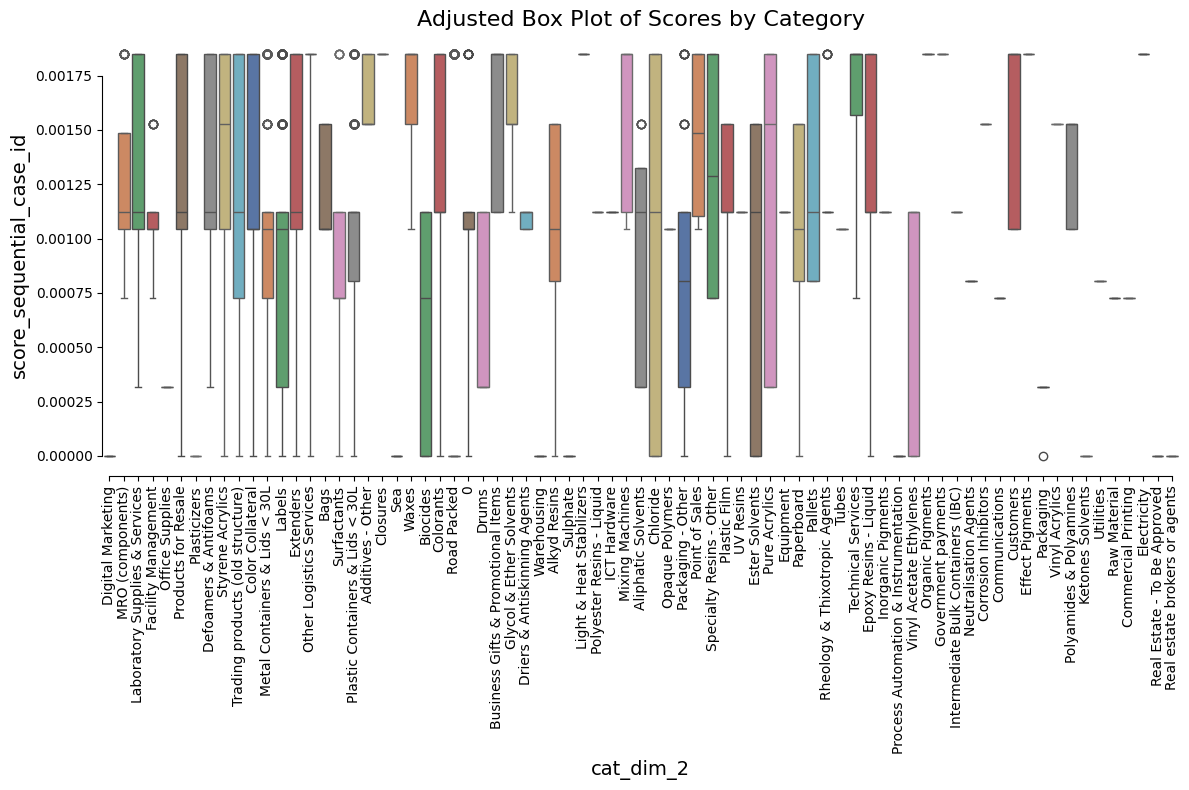

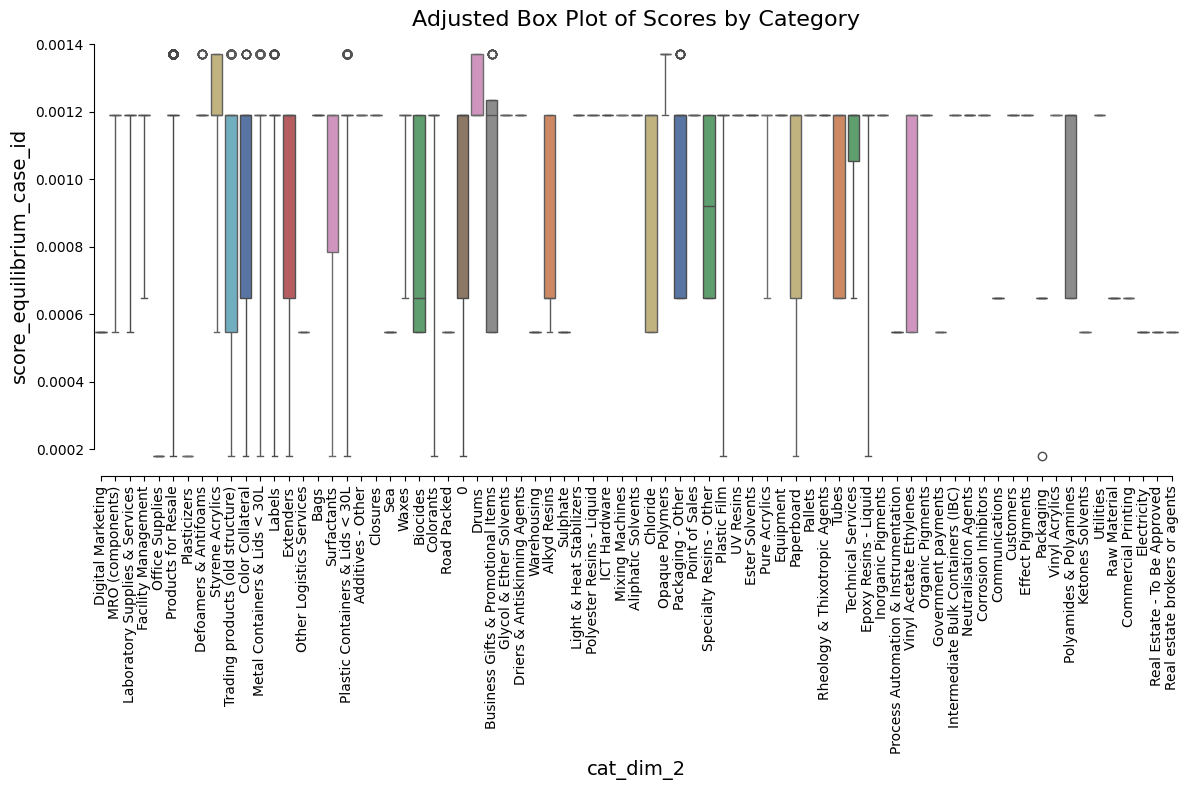

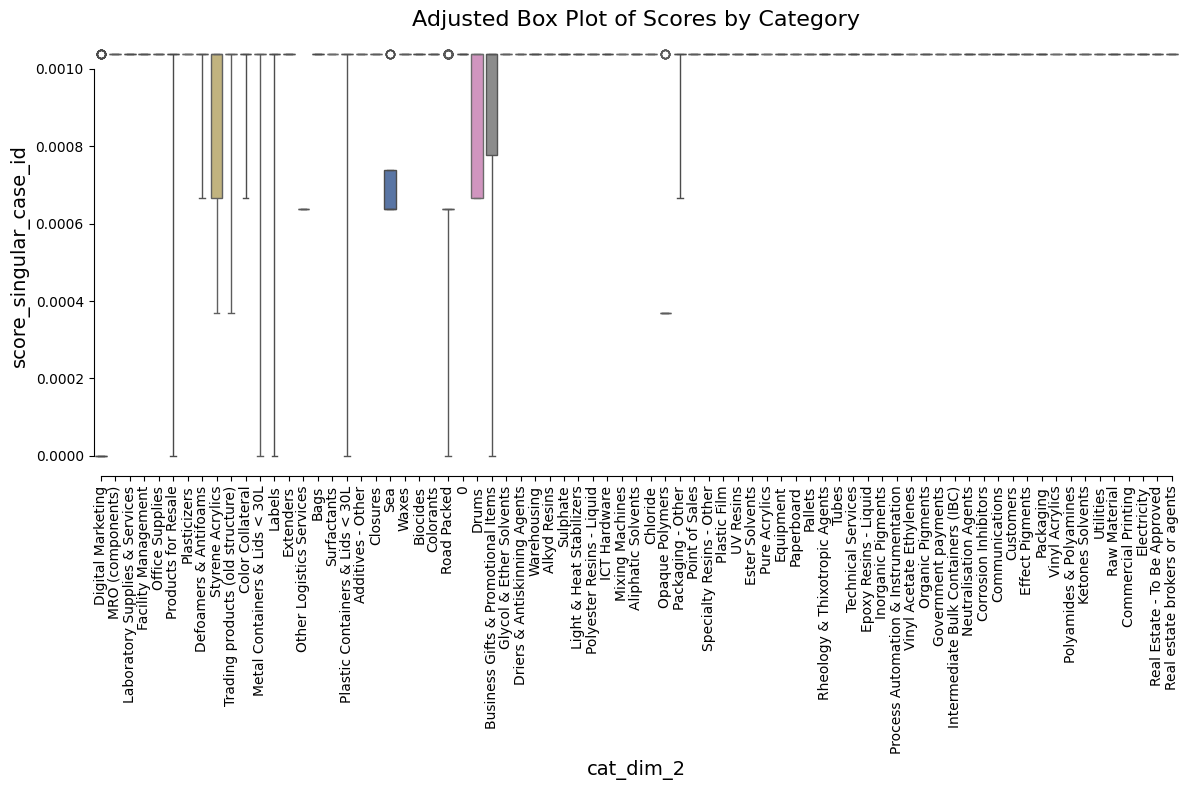

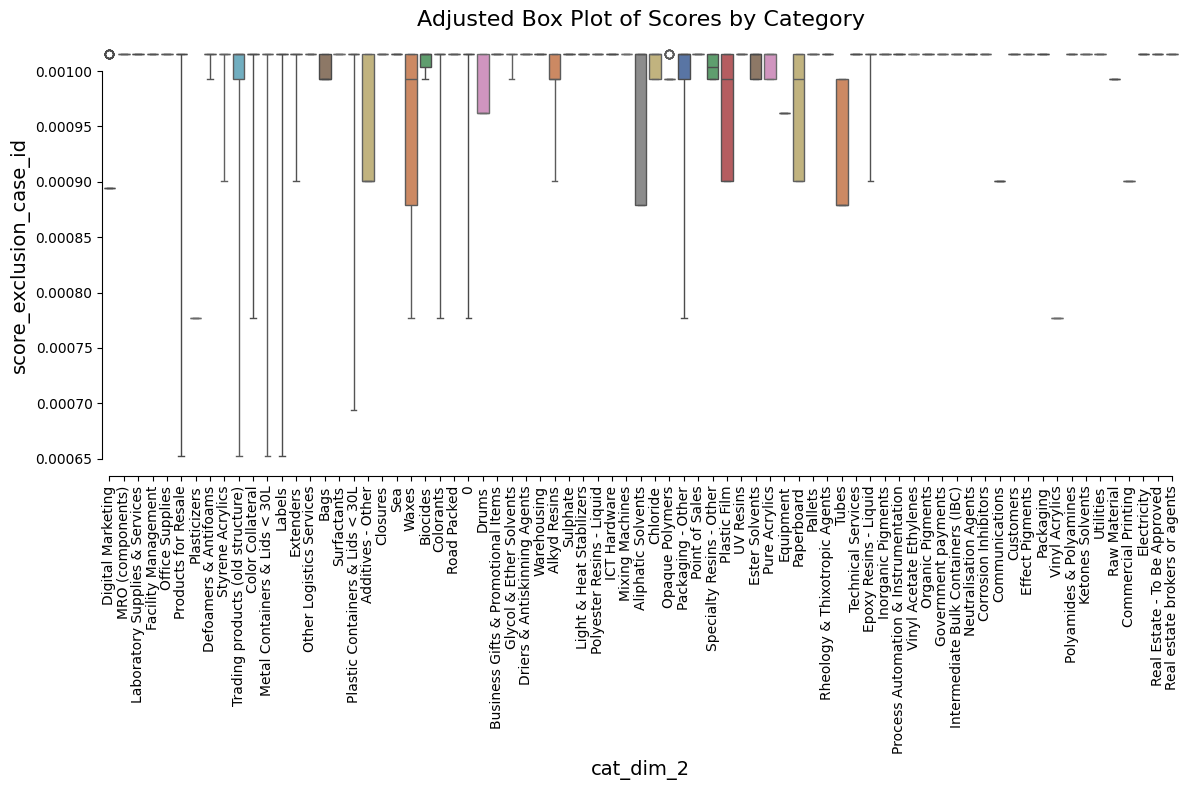

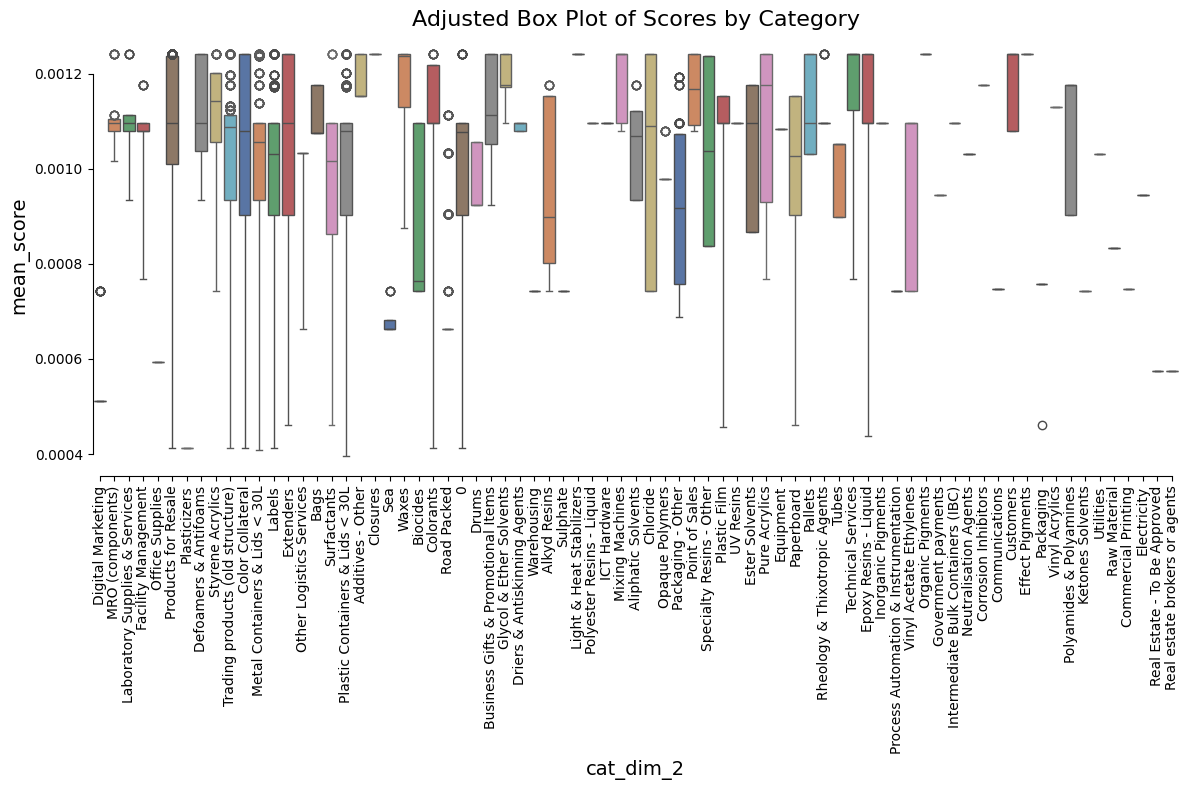

In [4]:
score_columns = [c for c in data.columns if 'score' in c]
for column in score_columns:
   analyze_performance(visualize=True, category='cat_dim_2', score=column, method='adjusted')

# Marketing Analysis

From provided analysis especially sequential scoring seems to be the feature with the most impact on the target variable.
## Detailed Analysis of Sequential Scoring for Marketing Category in BPIC_2019 Dataset

### Observations from the Box Plot

- **Wide Range of Variability**: Several categories display a wide variability in scores, indicated by long boxes and whiskers. This suggests significant variability in the sequential processing times and adherence to the expected sequences.

- **Presence of Outliers**: There are numerous outliers across different categories, which might indicate exceptional cases or anomalies in process execution. These outliers could be due to unusual delays, advancements in the process flow, or perhaps errors in data recording.

- **Densely Packed Categories**: Some categories have densely packed scores with shorter interquartile ranges, indicating more consistent processing relative to others.

### Analysis Plan

1. **Identify Key Outliers**
   - **Objective**: Determine the cause of outliers in categories with high variability.
   - **Actions**: 
     - Drill down into individual cases that are outliers.
     - Understand whether they are due to process inefficiencies, data entry errors, or exceptional but valid scenarios.

2. **Category Performance Review**
   - **Objective**: Compare categories with higher median scores against those with lower scores to identify best practices or inefficiencies.
   - **Actions**: 
     - Analyze the steps involved in categories with higher performance.
     - Replicate successful strategies across other categories.

3. **Correlation Analysis**
   - **Objective**: Investigate if there’s a correlation between the sequence timings and other variables in the dataset such as volume of transactions, time of the year, or specific vendors involved.
   - **Actions**: Use statistical tools to analyze correlations and potentially build predictive models to understand impacts on the sequential scores.

4. **Process Optimization**
   - **Objective**: Enhance process efficiency where sequential scores are low.
   - **Actions**: 
     - Based on findings from outlier and performance reviews, suggest process adjustments or training where needed.

5. **Automated Alert System**
   - **Objective**: Early identification of deviations from the expected sequential process.
   - **Actions**: Develop or propose an automated monitoring system that alerts process managers when sequences deviate from established norms significantly.

6. **Longitudinal Study**
   - **Objective**: Understand trends over time.
   - **Actions**: 
     - If data across multiple years is available, analyze trends to see if there is improvement or deterioration in sequential scoring over time, which can guide long-term strategy adjustments.

### Immediate Actionable Insights

- **Prioritize Investigation of Extreme Outliers**: Immediate review of cases falling far outside the normal range to quickly address any ongoing issues or to capture insights from positive deviations.

- **Standardization Efforts**: For categories with high variability, consider standardizing the processes further to reduce the variability in how sequences are handled.

- **Training and Development**: Focus on training for categories where sequences often fail to follow the expected order, especially if these missteps can lead to financial losses or operational inefficiencies.

This structured approach provides a clear pathway to dive deeper into the dataset, using insights gained from the initial box plot analysis to drive improvements and ensure more robust and efficient process management within the organization.


## Further analysis

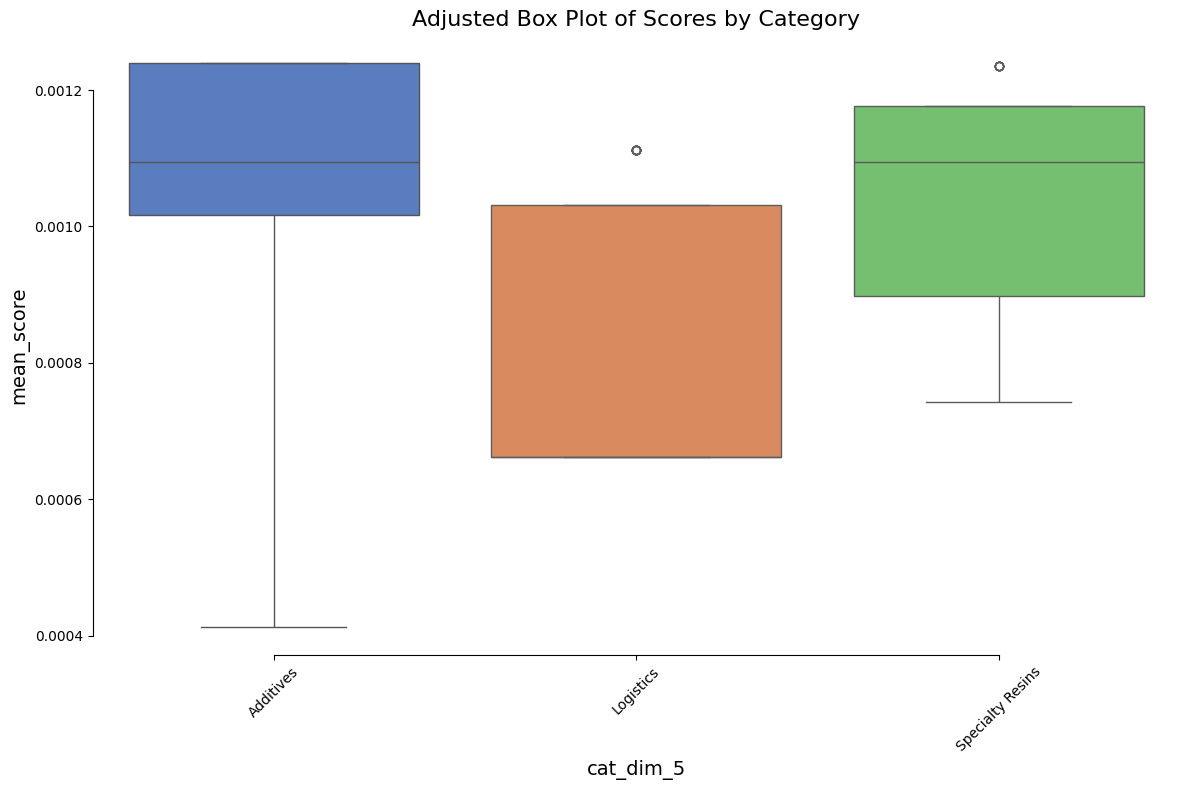

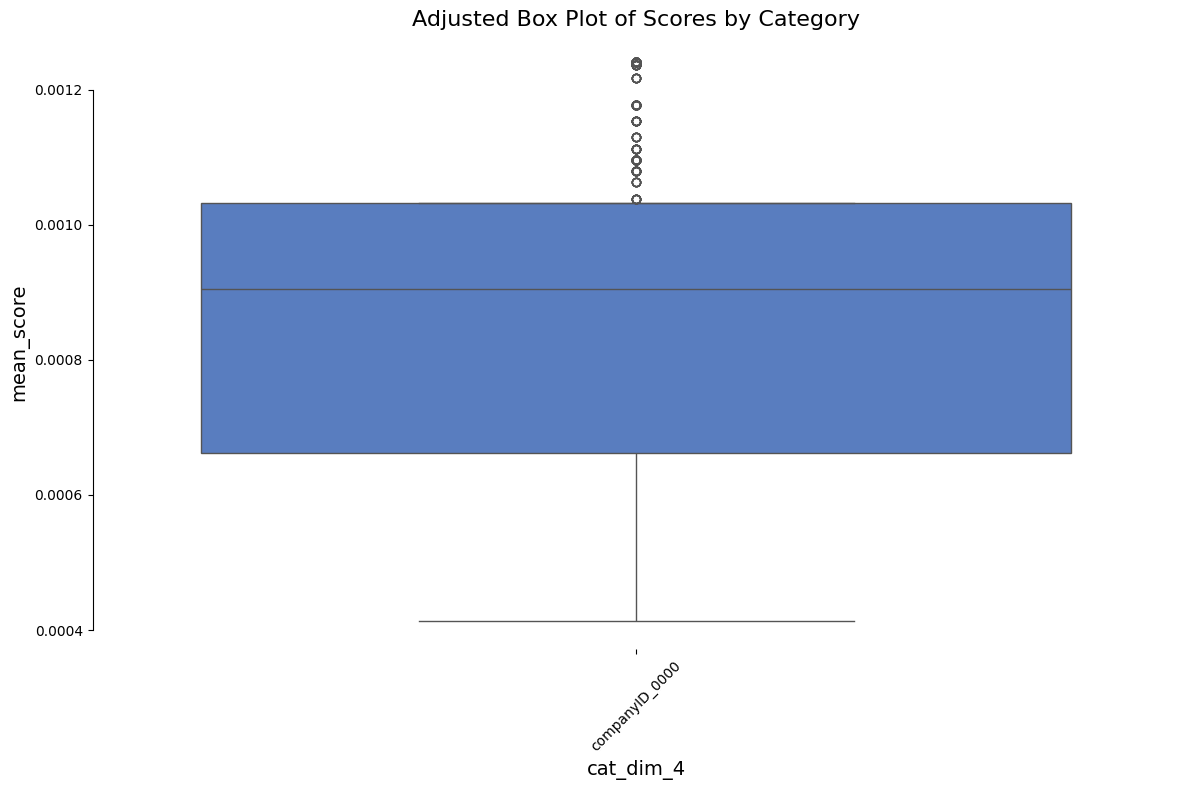

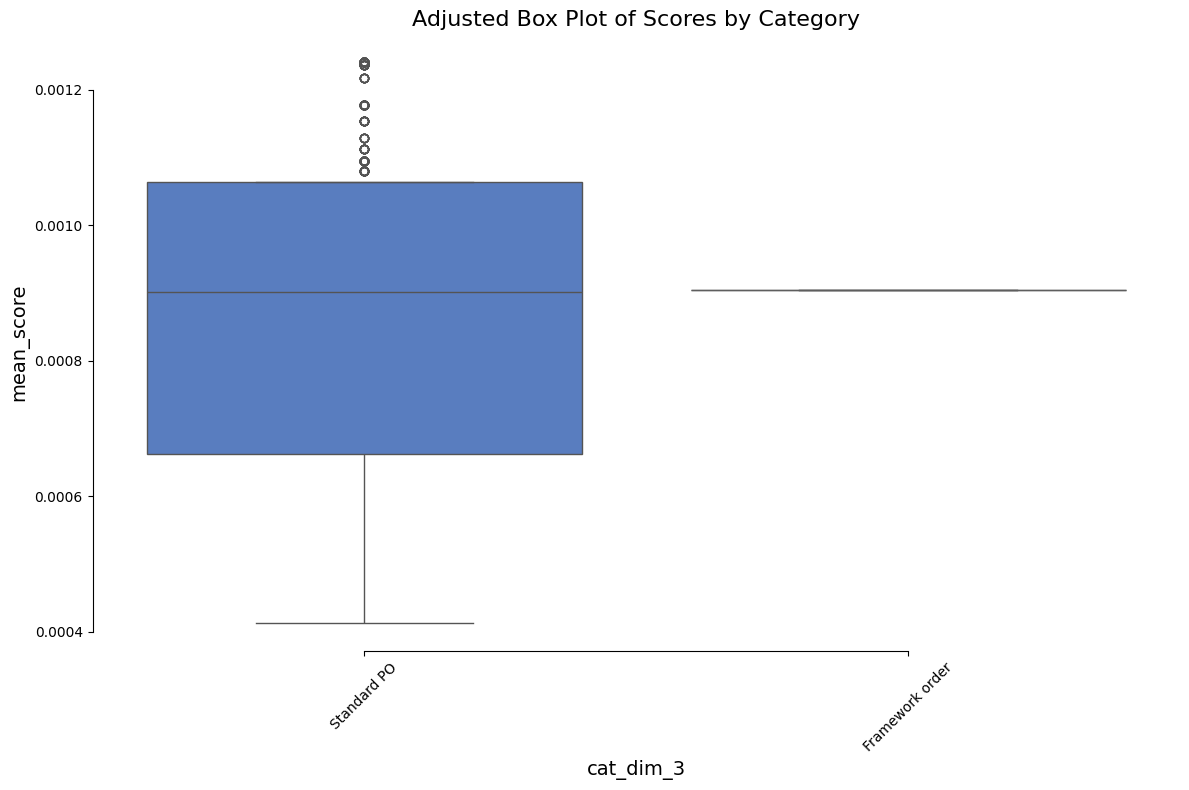

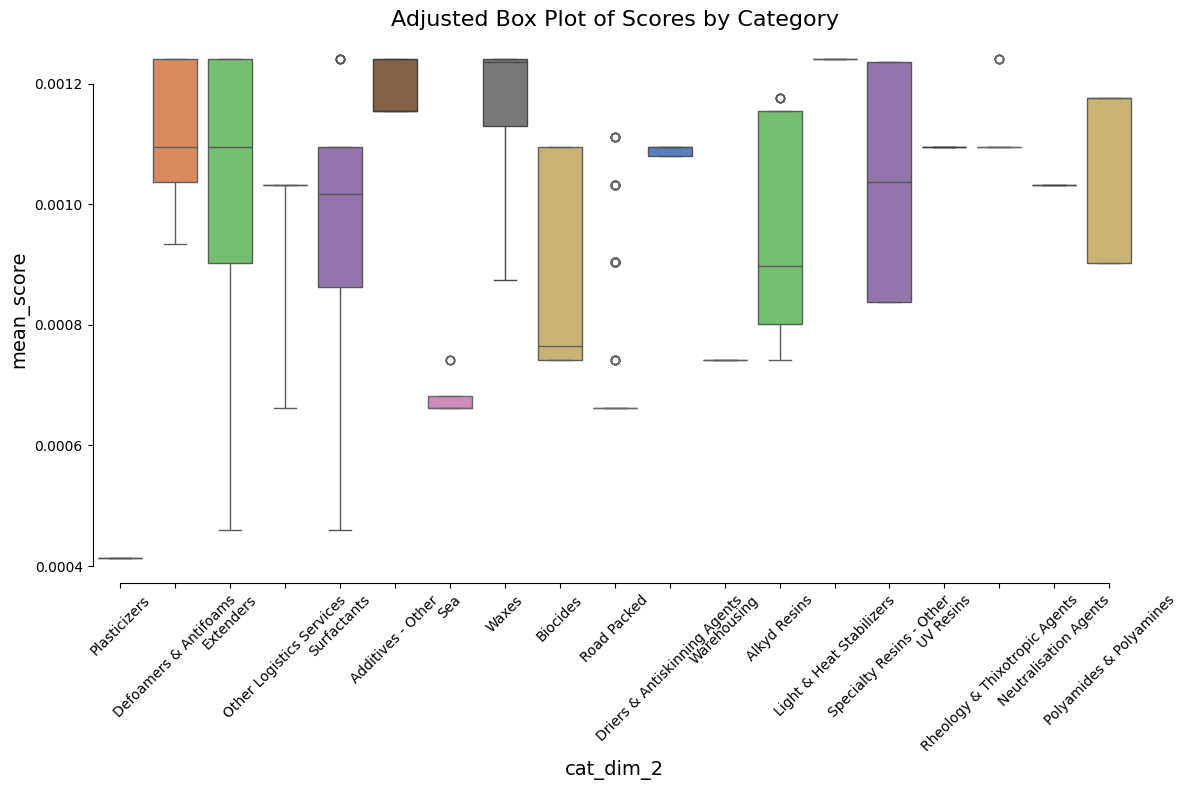

Error: y must be squeezable to a 1-d array for category cat_dim_8


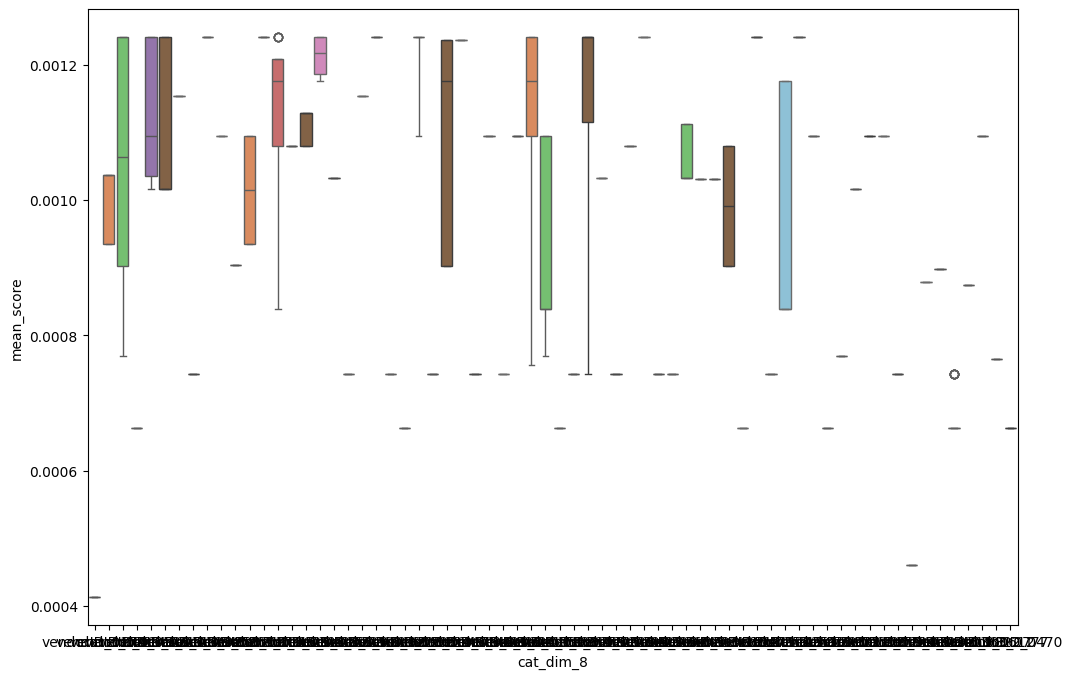

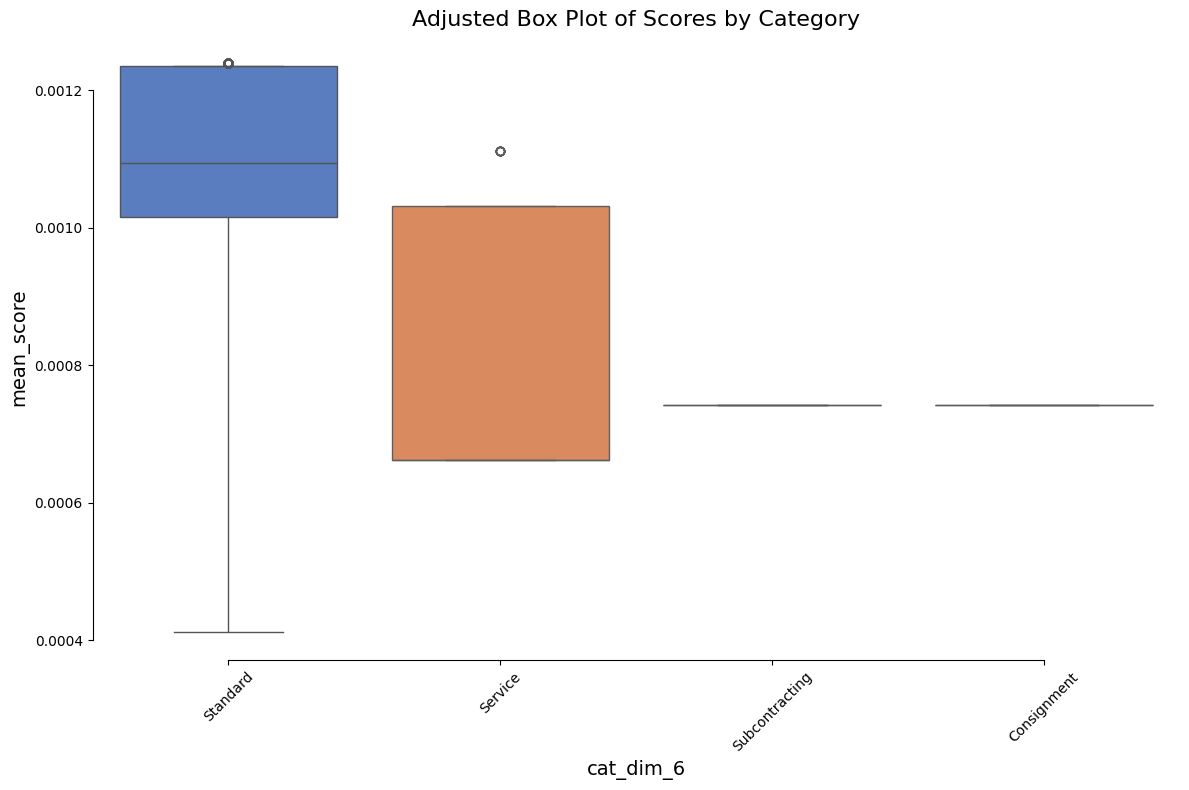

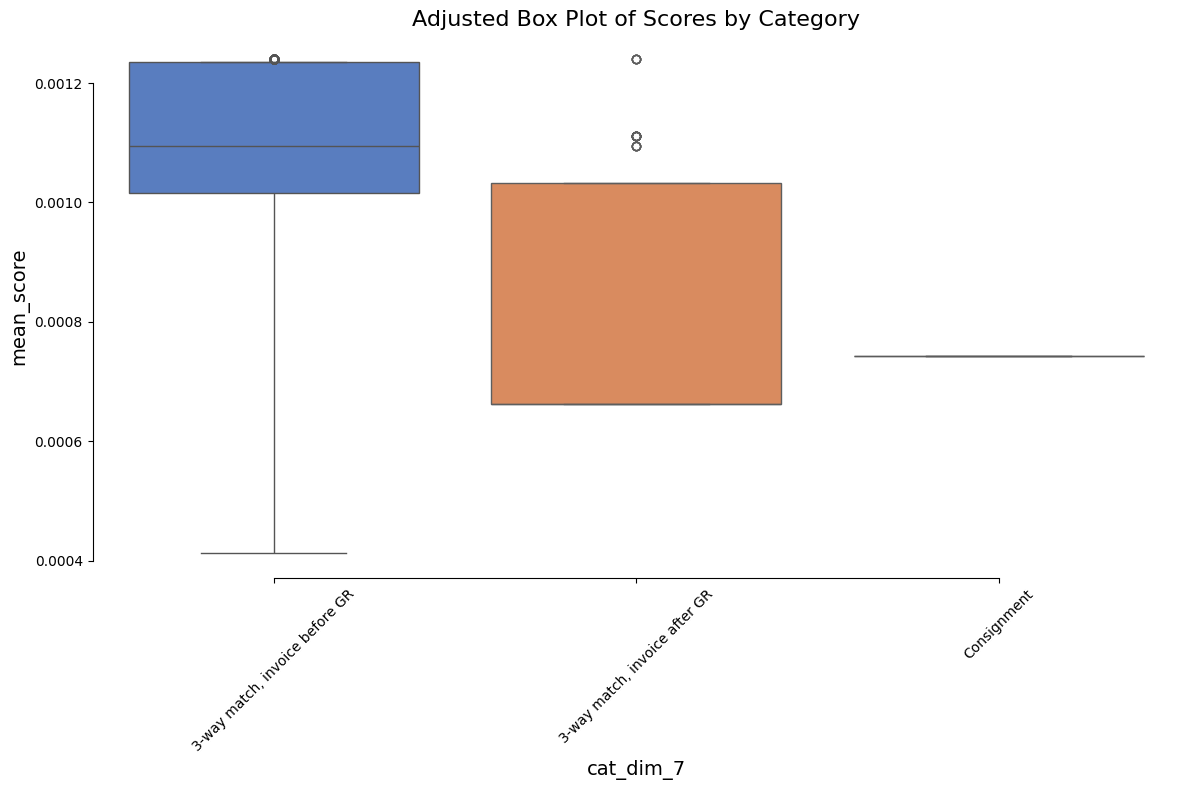

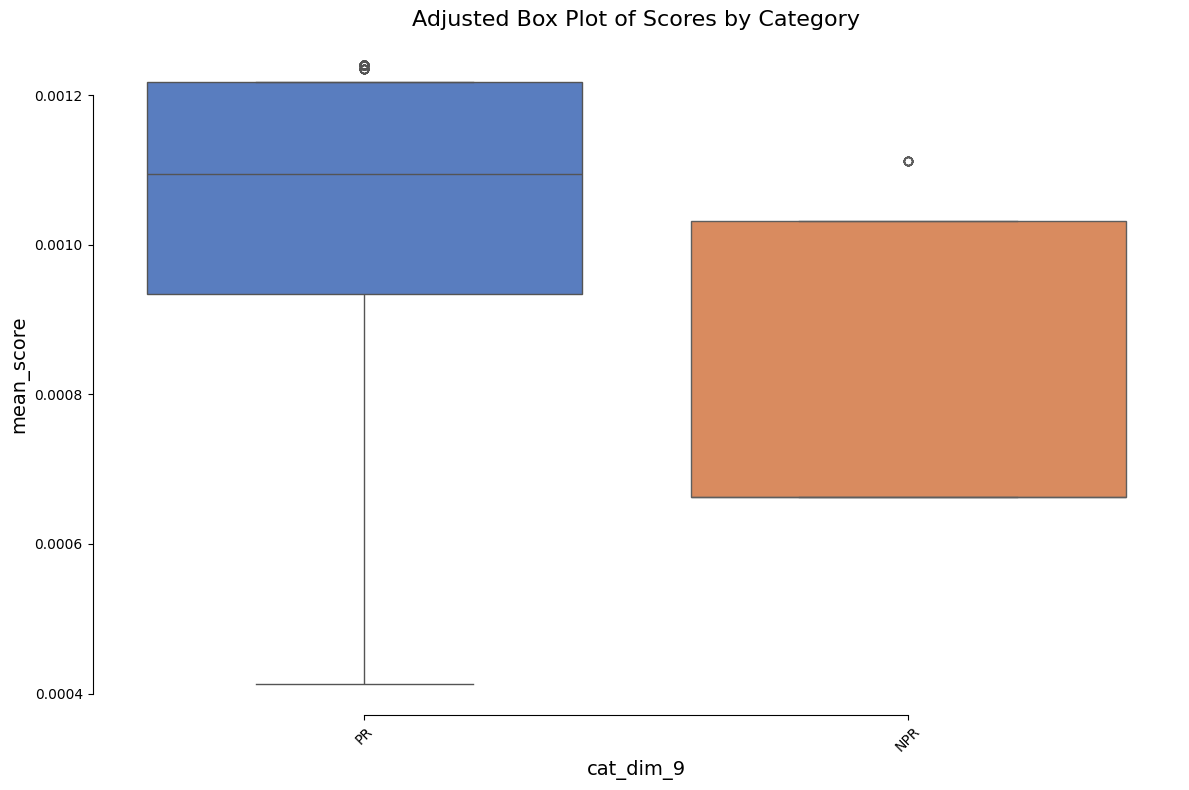

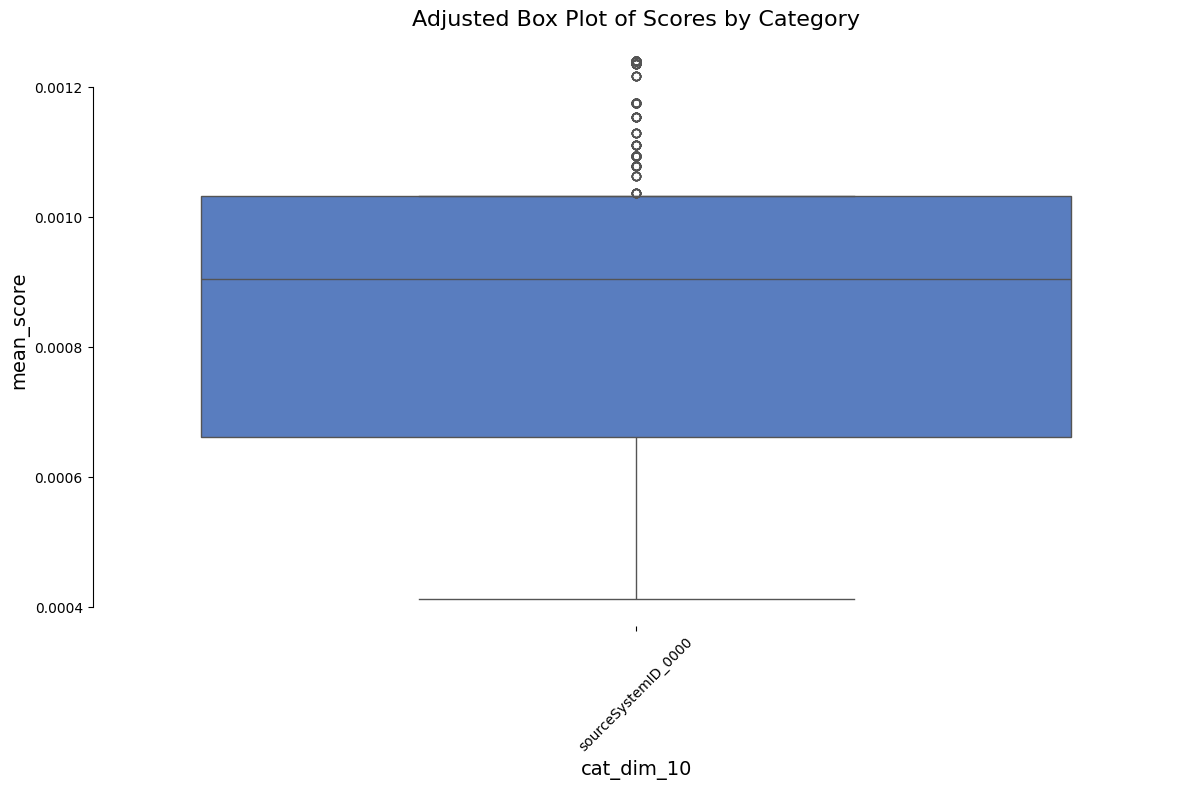

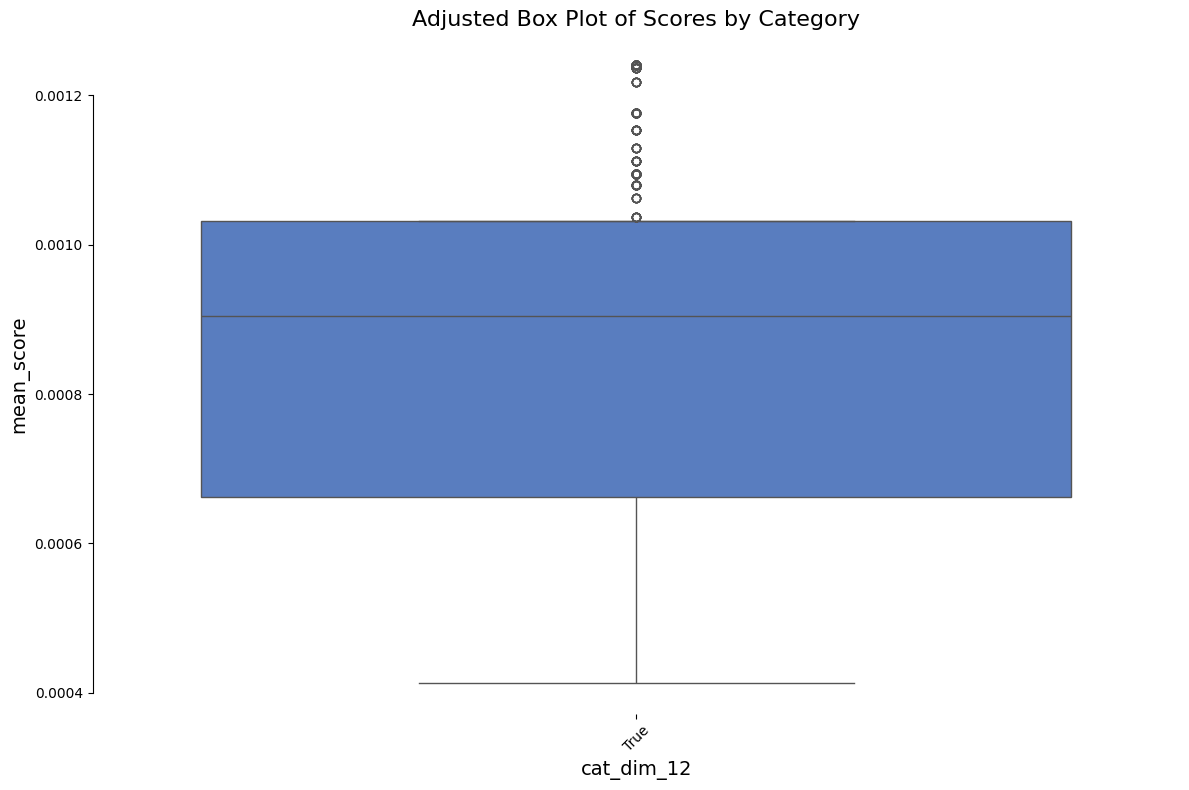

Error: y must be squeezable to a 1-d array for category cat_dim_resource


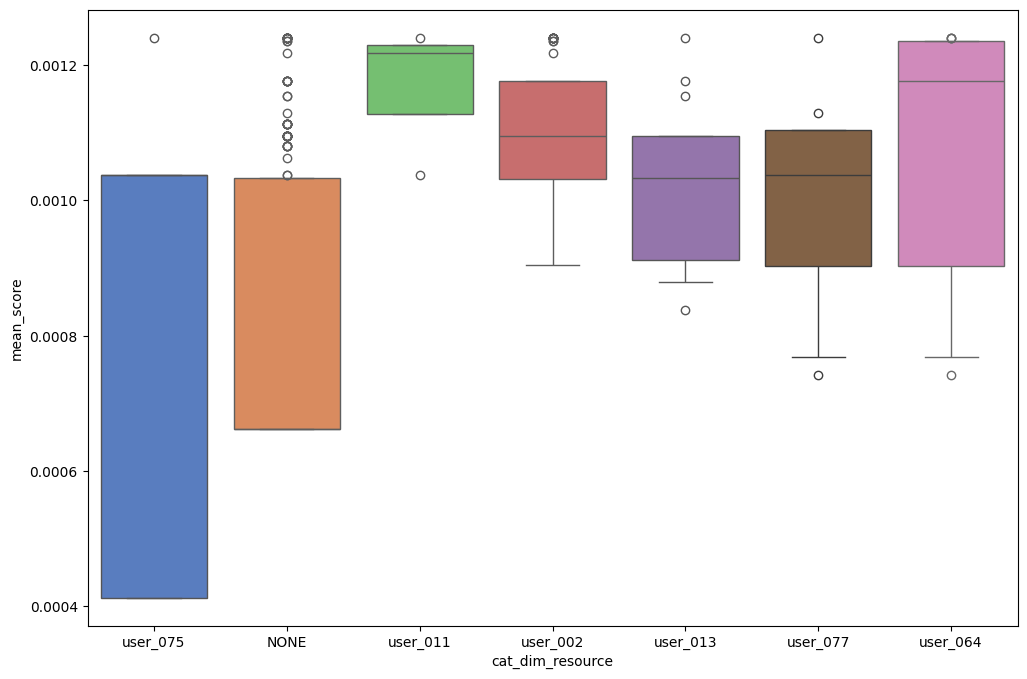

In [14]:
import pandas as pd

def select_high_variability_categories(data):
    """
    Selects categories with high variability for further analysis.
    
    Parameters:
    - data (pd.DataFrame): DataFrame containing the data with a column named 'cat_dim_5' for categories.

    Returns:
    - pd.DataFrame: Filtered DataFrame containing only the selected high variability categories.
    """
    # Define the categories with high variability
    high_variability_categories = ['Additives', 'Logistics', 'Specialty Resins']

    # Filter the data for these categories
    filtered_data = data[data['cat_dim_5'].isin(high_variability_categories)]
    
    return filtered_data

data_high_variability = select_high_variability_categories(data)
cat_high_variability = [col for col in data_high_variability.columns if col.startswith('cat_dim')]


for category_hv in cat_high_variability:
    try:
        analyze_performance(visualize=True, category=category_hv, score='mean_score', method='adjusted', data_filtered=data_high_variability)
    except ValueError as e:
        print(f"Error: {e} for category {category_hv}")


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def select_high_variability_categories(data):
    """
    Selects categories with high variability for further analysis.
    
    Parameters:
    - data (pd.DataFrame): DataFrame containing the data with a column named 'cat_dim_5' for categories.

    Returns:
    - pd.DataFrame: Filtered DataFrame containing only the selected high variability categories.
    """
    # Define the categories with high variability
    high_variability_categories = ['Additives', 'Logistics', 'Specialty Resins']

    # Filter the data for these categories
    filtered_data = data[data['cat_dim_5'].isin(high_variability_categories)]
    
    return filtered_data

def plot_category_scores(data, category_column, score_column='mean_score'):
    """
    Plots boxplot for the selected category and score column with unique colors for each category using a calmer color palette.
    
    Parameters:
    - data (pd.DataFrame): DataFrame containing the data.
    - category_column (str): The category column to plot.
    - score_column (str): The score column to use for plotting.
    """
    plt.figure(figsize=(12, 8))
    # Creating a color palette that can dynamically adjust to the number of categories
    unique_categories = data[category_column].nunique()
    # Using 'muted' palette for calmer colors
    palette = sns.color_palette("muted", unique_categories)
    
    # Plotting with the color palette
    sns.boxplot(x=category_column, y=score_column, data=data, palette=palette)
    plt.title(f'Box Plot of {score_column} by {category_column}')
    plt.xticks(rotation=90)
    plt.xlabel(category_column)
    plt.ylabel(score_column)
    sns.despine(trim=True)
    plt.show()

def interactive_plot(data):
    """
    Creates an interactive plot with a dropdown to select the category column.
    
    Parameters:
    - data (pd.DataFrame): DataFrame containing the data.
    """
    category_columns = [col for col in data.columns if col.startswith('cat_dim')]
    
    dropdown = widgets.Dropdown(
        options=category_columns,
        value=category_columns[0],
        description='Category:',
        disabled=False,
    )
    
    def update_plot(category_column):
        plot_category_scores(data, category_column=category_column)

    interactive_widget = widgets.interactive(update_plot, category_column=dropdown)
    display(interactive_widget)


data_high_variability = select_high_variability_categories(data)  # Assuming 'data' is defined and contains relevant columns
interactive_plot(data_high_variability)


interactive(children=(Dropdown(description='Category:', options=('cat_dim_5', 'cat_dim_4', 'cat_dim_3', 'cat_d…